# Effects of Loan Characteristics on Borrower's APR

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their Borrower's APR. The main focus was on understanding how various attributes of a loan such as loan origination amount and term or characteristics of the borrower such as employment status and revolving credit affect the APR borrower receives.

## Dataset Overview

The dataset consists of 113937 rows and 81 columns where each row is a loan entry. The columns describe details regarding the loan and background information of the borrower. Several cleaning steps were incorporated to remove rows with missing data or outliers. Further only the columns needed for the purpose of analysis were kept.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanDataCleaned.csv')

In [3]:
def createCategoricalType(df, ordered_type, column_name):
    cat_ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_type)
    df[column_name] = df[column_name].astype(cat_ordered_var)

In [4]:
# order categories
terms_cat_ordered = [12,36,60]
prosperRating_cat_ordered = ['HR','E','D','C','B','A','AA']
employmentStatus_cat_ordered = ['Not employed','Retired','Other','Part-time','Full-time','Self-employed','Employed']

createCategoricalType(df_loan, terms_cat_ordered, 'Term')
createCategoricalType(df_loan, prosperRating_cat_ordered, 'ProsperRating (Alpha)')
createCategoricalType(df_loan, employmentStatus_cat_ordered, 'EmploymentStatus')

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   BorrowerAPR              84853 non-null  float64 
 1   LoanOriginalAmount       84853 non-null  int64   
 2   ProsperScore             84853 non-null  float64 
 3   StatedMonthlyIncome      84853 non-null  float64 
 4   Occupation               83520 non-null  object  
 5   CreditScoreRangeLower    84853 non-null  float64 
 6   CreditScoreRangeUpper    84853 non-null  float64 
 7   AvailableBankcardCredit  84853 non-null  float64 
 8   RevolvingCreditBalance   84853 non-null  float64 
 9   Term                     84853 non-null  category
 10  ProsperRating (Alpha)    84853 non-null  category
 11  EmploymentStatus         84853 non-null  category
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 6.1+ MB


## Distribution of BorrowerAPR

The Borrower's Annual Percentage Rate (APR) for the loan. Borrower APR in the dataset take on range of values between 0.04(4%) to 0.4(40%). The distribution of borrower APR takes on a multimodal shape.

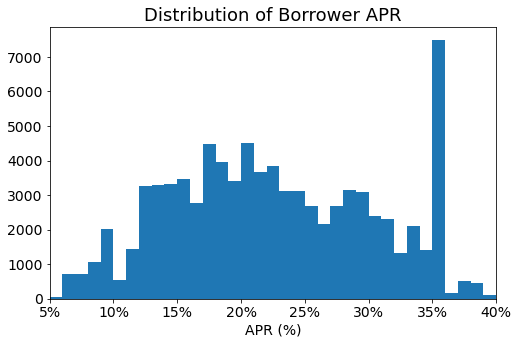

In [6]:
binsize = 0.01
max_borrowed_apr = df_loan['BorrowerAPR'].max()
bins = np.arange(0, max_borrowed_apr+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins)
plt.title('Distribution of Borrower APR', fontsize=18)
plt.xlim([0.05, 0.4])
plt.xticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40], ['5%', '10%', '15%', '20%', '25%', '30%','35%','40%'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('APR (%)',fontsize=14)
plt.show()

## Distribution of Original Loan Amount

The origination amount of the loan. Spikes are observed at 10k, 15k, 20k and 25k which tells us that these are propular loan amounts.

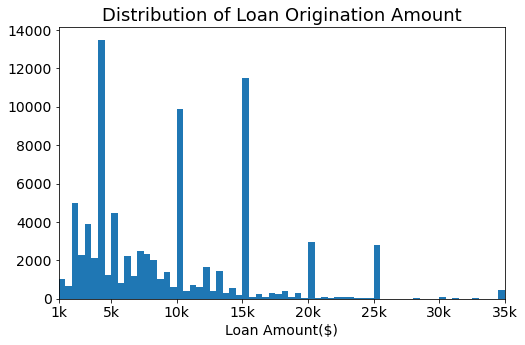

In [7]:
binsize = 500
max_loanOriginalAmount = df_loan.LoanOriginalAmount.max()
bins = np.arange(0, max_loanOriginalAmount+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Origination Amount', fontsize=18)
plt.xlim([1000,35000])
plt.xlabel('Loan Amount($)',fontsize=14)
plt.xticks([1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], ['1k', '5k', '10k', '15k', '20k', '25k','30k','35k'], fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Borrower APR vs. Prosper Score

Each borrower is assigned a prosper score which is a judgment of his worthyness. Higher the score, better the rating which usually results in a lower borrower's APR. The plot below shows a negative relationship between them which explains that a lower prosper score results in higher borrower's APR.

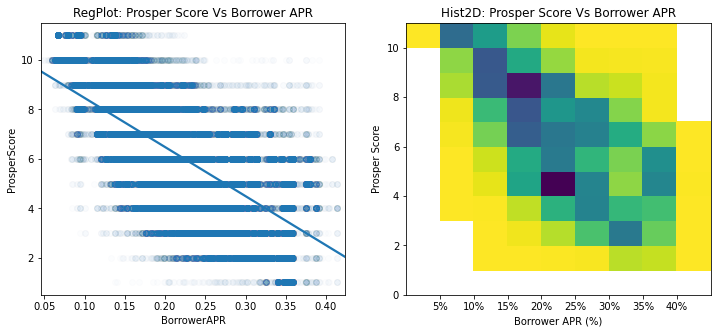

In [8]:
max_borrower_apr = df_loan['BorrowerAPR'].max()
max_prosper_score = df_loan['ProsperScore'].max()
binsize = 0.05
bins_borrowerApr = np.arange(0, max_borrower_apr + binsize, binsize)
binsize = 1
bins_prosper_score = np.arange(0, max_prosper_score + binsize, binsize)

fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(121, title='RegPlot: Prosper Score Vs Borrower APR', xlabel='Borrower APR (%)', ylabel='Prosper Score')
ax2 = plt.subplot(122, title='Hist2D: Prosper Score Vs Borrower APR', xlabel='Borrower APR (%)', ylabel='Prosper Score')

plt.xlim([0.05, 0.4])
plt.xticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40], ['5%', '10%', '15%', '20%', '25%', '30%','35%','40%'])
sb.regplot(data = df_loan, x = 'BorrowerAPR', y = 'ProsperScore', scatter_kws={'alpha':0.01},ax=ax1);

plt.xlim([0.05, 0.4])
plt.xticks([0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40], ['5%', '10%', '15%', '20%', '25%', '30%','35%','40%'])
ax2.hist2d( data = df_loan, 
            x= 'BorrowerAPR', 
            y = 'ProsperScore', 
            bins=[bins_borrowerApr, bins_prosper_score],
            cmap = 'viridis_r', 
            cmin = 0.5);

## Loan Origination Amount vs. Term

Here we compare the origination amount of the loan with the length of the loan expressed in months. We observe a positive trend here, with increase in term length there is an increase in loan origination amount. This is to be expected as most borrowers like to keep their monthly liability relatively low.

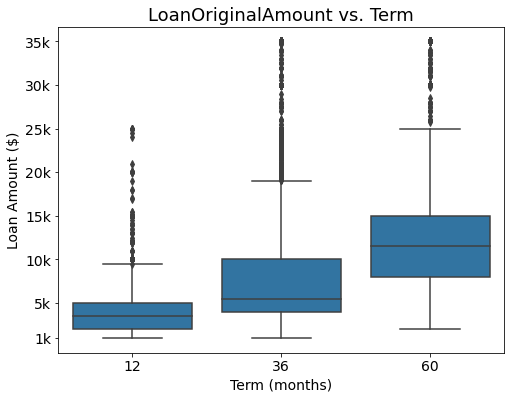

In [9]:
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=df_loan, x='Term', y='LoanOriginalAmount', color=default_color)
plt.xlabel('Term (months)', fontsize=14)
plt.ylabel('Loan Amount ($)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks([1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], ['1k', '5k', '10k', '15k', '20k', '25k','30k','35k'], fontsize=14)
plt.title('LoanOriginalAmount vs. Term', fontsize=18);

## Effects of Prosper Rating on the relationship between Borrower's APR and Loan Origination Amount

Overall loan origination amount increases with better rating while the borrower's APR decreases. Within each prosper rating group there is mostly a negative relationship between borrower's APR and loan origination amount but this relationship changes to slightly positive trend with better rating.

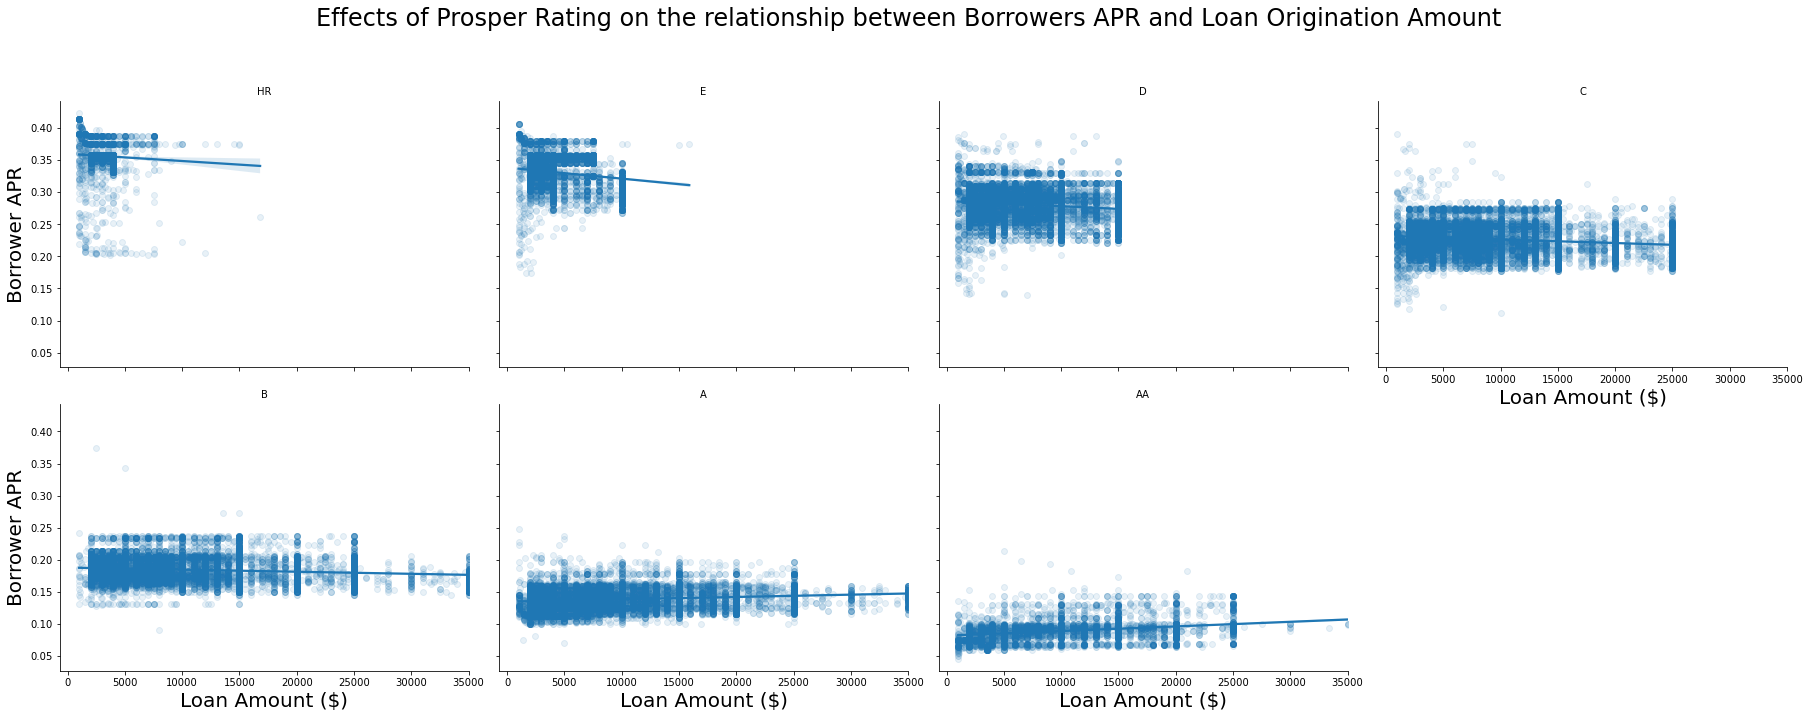

In [10]:
g=sb.FacetGrid(data=df_loan, col='ProsperRating (Alpha)', aspect=1.25, height=5, col_wrap=4);
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.suptitle('Effects of Prosper Rating on the relationship between Borrowers APR and Loan Origination Amount', fontsize=24);
g.set_xlabels('Loan Amount ($)', fontsize=20);
g.set_ylabels('Borrower APR', fontsize=20);
g.set_titles('{col_name}', fontsize=24);
g.add_legend();
plt.subplots_adjust(top=0.85);

## BorrowerAPR Vs Credit Score & Prosper Score

Overall a negative trend is observed between Borrower APR and credit score. From the visualization we can see that for scores below 700, there are very few points below an APR of 0.20. We also observe that the darker coloring of each point, referring to lower prosper score all lie near higher BorrowerAPR.

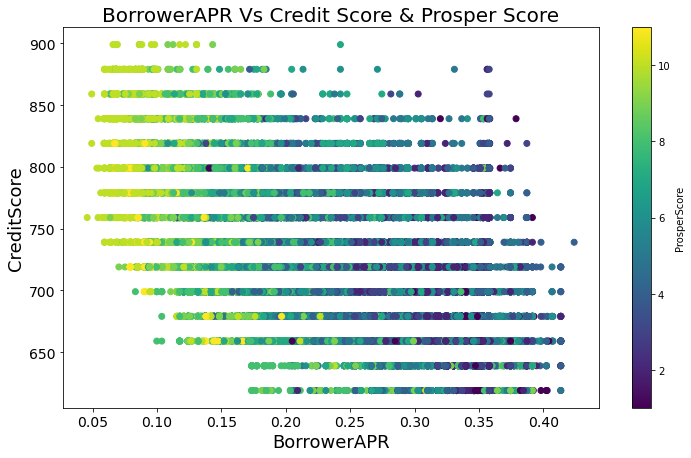

In [11]:
plt.figure(figsize=[12,7])
plt.title('BorrowerAPR Vs Credit Score & Prosper Score', fontsize=20)
plt.xlabel('BorrowerAPR', fontsize=18)
plt.ylabel('CreditScore', fontsize=18)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14)
plt.scatter(data = df_loan, x = 'BorrowerAPR', y='CreditScoreRangeUpper', c = 'ProsperScore');
plt.colorbar(label = 'ProsperScore');